In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# Homework # – Simpson's Paradox

## Data 6, Summer 2024

Today, we will be getting more practice with the basic and advanced table functions, as well as the visualization methods, that we've covered in the past few labs. We'll be applying these skills to explore the statistical and sociological components of an interesting phenomenon that sometimes occurs in data called Simspon's Paradox. We'll discuss more about what this paradox entails later on, but in short, this paradox shows us the importance of considering multiple approaches to a problem in data science before accepting the results and conclusions of one method.

To explore this paradox, we'll be looking into a case study regarding UC Berkeley's graduate admissions from 1973. To explore the paradox, we'll be using two sources for information and data on this case study, which include [the Wikipedia page for Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox), as well as [this paper from Bickel et al.](https://homepage.stat.uiowa.edu/~mbognar/1030/Bickel-Berkeley.pdf) that was originally published to the American Association for the Advancement of Science journal in 1975.

**TODO:** elaborate more on introduction and breakdown of notebook here later

After completing this notebook, you will have learned how to:
* Understand what Simpson's paradox is and how it occurs
* Apply basic and advanced table methods to (dis)aggregate and visualize data
* Analyze the effect of confounding variables on associations between data
* Critique and consider the implications of conclusions drawn from data presented in a certain way

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 1: Understanding the Case Study

Let's begin exploring this paradox by going through the [Bickel et al.](https://homepage.stat.uiowa.edu/~mbognar/1030/Bickel-Berkeley.pdf) paper. We'll get an idea of what steps they took in exploring the data they had from the 1973 graduation admissions, and we'll analyze some of their findings and figures to see how they connect to the paradox.

### Data and Assumptions

From the "Data and Assumptions" section on the first page, we see that the authors had data on all approximately 15,000 applications. Their main purpose of exploring this data was to see if the sex of the applicant in any way influenced the decision to admit or deny any particular student. If there was any statistically significant result from this exploration, there would be a **bias** on sex present, and from there, they might hope to explore if a **discrimination** also existed.

In order to explore if the applicant's sex influenced the admission decision on said applicant, the authors started with a first approach:

### Question 1.1 (Discussion)
In your own words, explain the authors' first approach in determining whether a sex bias was present, as described on page 1. Using this method, what results did they find? Does there appear to be a sex bias when using this first method? From your own judgment (and also information from the two paragraphs about the assumptions made, if you'd like), do you think this method is the most effective in exploring if a sex bias is present?

**SOLUTION:** The authors' first approach is to calculate the admission rates for male vs. female applicants aggregated across all applications. Using this method, they found that the male admission rate was 44% and the female admission rate was 35%; based solely on these two rates, there appears to be a sex bias for males and against females. However, as implied in the assumptions section, we may have reason to believe that this method isn't the most effective in this case, as there's a possibility that there may be other factors in admission that are also assocciated with the sex ratios.

---
### Some Underlying Dependencies

In the "Some Underlying Dependencies" section on page 2, the authors bring up how their second assumption (the assumption that "the sex ratios of applicants to the various fields of graduate study are not importantly associated with any other factors in admission") being false results in a case of Simpson's paradox. They describe it as:

> "We have stumbled onto a paradox, sometimes referred to as Simpson's in this context (1) or 'spurious correlation' in others (2). It is rooted in the falsity of assumption 2 above. We have assumed that if there is a bias in the proportion of women applicants admitted it will be because of a link between sex of applicant and decision to admit. We have given much less attention to a prior linkage, that between sex of applicant and department to which admission is sought."

### Question 1.2 (Multiple Choice)
From the statement above, which of the following options describes an **important, initially overlooked factor** that the authors believe is associated with the sex of the applicant? You should answer the question by assigning `q1_2` to `make_array(...)` where `...` is the choice of your answer (eg. `make_array(3, 4)`).

1. Department the applicant applies to
2. Whether the student was an athlete or not
3. Decision to admit the applicant or not
4. Race/ethnicity of the student

In [ ]:
q1_2 = make_array(1) # SOLUTION

Understanding the answer to the question above is crucial, so there were no hidden tests placed on it. As the authors describe, the paradox arises from prior linkages or associations between other variables affecting the trend between the sex of the applicant and the decision to admit them. The prior linkage that the authors discover is between the sex of the applicant and the department the applicant applies to; as they describe later on in the "Some Underlying Dependencies" section, different sexes tend to apply to very different departments. **In fact, they discover that in departments that are harder to get into (i.e. departments that have lower acceptance rates), there is a higher proportion of female applicants, and in departments that are easier to get into, there is a lower proportion of female applicants.**

Because of this, we can see why calculating the admission rates for males vs. females across all departments aggregated together may not actually be effective. Instead, we should consider the **admission rates at a department level** in order to get a clearer idea of the true discrepancy in admission rates.

**TODO:** add more questions to this section relating to the paper, or end off with a transition to the next part

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 2: Seeing Simpson's Paradox

Now that we've explored some of the findings from the Bickel et al. paper, we'll be utilizing some table and visualization methods to explore the data provided on the Wikipedia page for Simpson's paradox to see if we can reproduce similar results.

In [2]:
cal_data  = Table.read_table("data/UCBerkeley1973_Admission.csv")
cal_data

Year,Major,Gender,Admission
1973,C,F,Rejected
1973,B,M,Accepted
1973,Other,F,Accepted
1973,Other,M,Accepted
1973,Other,M,Rejected
1973,Other,M,Rejected
1973,F,F,Accepted
1973,Other,M,Accepted
1973,Other,M,Rejected
1973,A,M,Accepted


### Question 2.1 (Discussion)
Looking at `cal_data` first glance, what do you observe? Try exploring the dataset by what you have learned so far in class! Reflect in 2-3 sentences on what you have noticed about te data. Feel free to add/ delete more cells beyond our given cell.

**SOLUTION:** The answer may vary. Looking at the data, `cal_data` has 3 columns: "Major", "Gender", "Admission", which all have the data type of string. Just measuring the acceptance rate of Female and Male, there seems to be higher acceptance rate for Males for UC Berkeley Admission. To compare different discrete variables such as Gender groups, Majors, and Admission results, it might be best to visualize with bar graphs. There is no specific names of the withinn the Major; There is only two gender listed in the dataset; There is only Rejected or Accepted state for Admission.

In [ ]:
# You can use this cell to explore the `cal_data` table

For this case study, we'll be doing some exploration of the rates of admission between males and females at UC Berkeley in 1973. To start off, below we calculate the raw acceptance rates for males and females:

In [3]:
total_f = sum(cal_data.column("Gender") == "F")
total_m = sum(cal_data.column("Gender") == "M")
accepted_f = cal_data.where("Admission", "Accepted").where("Gender", "F").num_rows
accepted_m =  cal_data.where("Admission", "Accepted").where("Gender", "M").num_rows
acceptance_rate_f = accepted_f / total_f * 100
acceptance_rate_m = accepted_m / total_m * 100
print("1973's Berkeley admission rate seems to be: female:", acceptance_rate_f, "and male:", acceptance_rate_m)

1973's Berkeley admission rate seems to be: female: 34.5753297848 and male: 44.2786069652


Keep these rates in mind as we begin exploring some visualization and table methods to look into an effect called **"Simpson's Paradox"**. 

### Question 2.2
Using the `.pivot()` method, assign the table `admission_f_m` to one that contains the count of individuals rejected and accepted for both females and males.

*Hint:* Using the `cal_data` table, we want the `"Gender"` column to be our columns, and the `"Admission"` column to be our rows.

In [4]:
admission_f_m = cal_data.pivot('Admission', 'Gender') # SOLUTION
admission_f_m

Gender,Accepted,Rejected
F,1494,2827
M,3738,4704


### Question 2.3
We want to manually add a new column called `"Acceptance Rate"` with values of acceptance rates for females and males to the `admission_f_m` table. Below, fill in the code to calculate the female and male acceptance rates, and from there, we supply the code that creates a new column with these rates. Acceptance rate should be calculated as accepted count divided by total count!

*Hint:* You may find it helpful to use the `.column()` and `.item()` methods.

In [5]:
f_acceptance_rate = admission_f_m.column("Accepted").item(0) / (admission_f_m.column("Accepted").item(0) + admission_f_m.column("Rejected").item(0)) # SOLUTION
m_acceptance_rate = admission_f_m.column("Accepted").item(1) / (admission_f_m.column("Accepted").item(1) + admission_f_m.column("Rejected").item(1)) # SOLUTION
acceptance_rates = make_array(f_acceptance_rate, m_acceptance_rate)
admission_f_m = admission_f_m.with_column("Acceptance Rate",  acceptance_rates)
admission_f_m

Gender,Accepted,Rejected,Acceptance Rate
F,1494,2827,0.345753
M,3738,4704,0.442786


### Question 2.4
Using the adjusted `admission_f_m`, create a bar graph comparing the acceptance rate between female and male applicants. If you are stuck, consider taking a look at Lab 3 again!

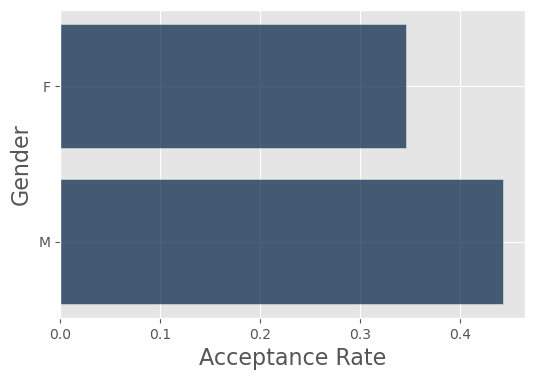

In [6]:
admission_f_m.barh("Gender", "Acceptance Rate") # SOLUTION

### Question 2.5
Which of the following most accurately describes the takeaway from the visualization created by `admission_f_m` above? You should answer the question by assigning `q2_5` to `make_array(...)` where `...` is the choice of your answer (eg. `make_array(3)`).

1. Female applicants have higher chance of being accepted.
2. Male applicants have higher chance of being accepted.
3. Female and male applicants have the same amount chance of being accepted.

In [ ]:
q2_5 = make_array(2) # SOLUTION

We see by simply utilizing `"Gender"` and `"Admission"` to calculate overall acceptance rates for graduate admissions, the male acceptance rate seems to be higher than the female acceptance rate. However, besides `"Gender"` and `"Admission"`, there was a third column in this table: `"Major"`. Let's investigate how the major will take into play with admission rate between these two recorded gender. (How "grouping" by major as described in Simpson's Paradox will affect the applicants' acceptance rate by gender).

Below, we'll be creating two different tables to analyze the (1) acceptance rates and (2) number of applicants, split by sex, to each major group. The work we'll need to do with `.group()` and `.pivot()` to create these tables is a bit more complex than what we've seen before, so let's break it down into smaller steps. We'll start by defining a function that calculates the acceptance rate. 

### Question 2.6
Performing pivot to create application count by sex and major table

In [7]:
num_applicants = cal_data.pivot('Gender', 'Major') # SOLUTION
num_applicants = num_applicants.relabeled(['F', 'M'], ['F Application Count', 'M Application Count'])
num_applicants

Major,F Application Count,M Application Count
A,108,1138
B,25,560
C,593,325
D,375,417
E,393,191
F,341,373
Other,2486,5438


### Question 2.7
Defining acceptance rate function, to be plugged into collect argument

In [23]:
def acceptance_rate(arr):
    temp_table = Table().with_columns('Admission', arr)
    accepted_only = temp_table.where('Admission', 'Accepted') # SOLUTION
    num_accepted = accepted_only.num_rows # SOLUTION
    return num_accepted / len(arr)

### Question 2.8
Performing pivot on cal_data using acceptance_rate function

In [24]:
admission_major = cal_data.pivot('Gender', 'Major', collect = acceptance_rate, values = 'Admission') # SOLUTION
admission_major = admission_major.relabeled(['F', 'M'], ['F Acceptance Rate', 'M Acceptance Rate'])
admission_major

Major,F Acceptance Rate,M Acceptance Rate
A,0.824074,0.724956
B,0.68,0.630357
C,0.338954,0.369231
D,0.349333,0.330935
E,0.239186,0.277487
F,0.0733138,0.0589812
Other,0.376911,0.409526


### Question 2.9
Using `admission_major` and `num_counts`, create two separate overlaid bar charts. The first one will plot the number of applicants of males and females across the six majors, and the second will plot their acceptance rates in the majors.

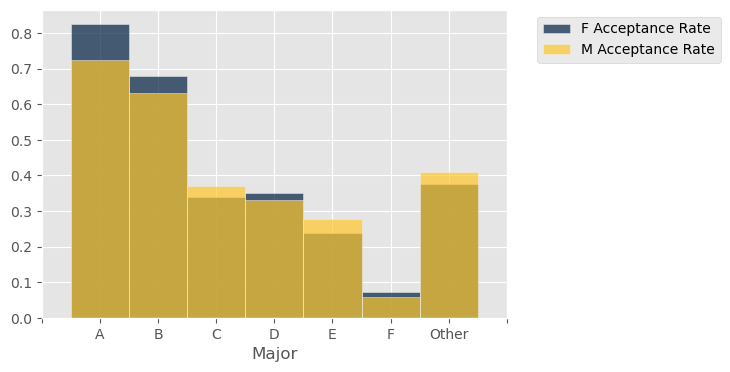

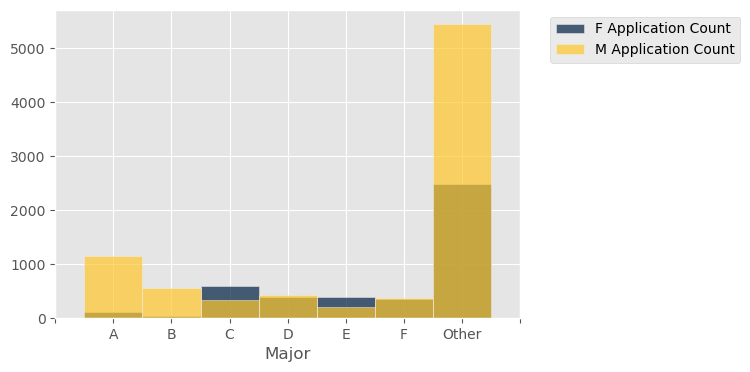

In [10]:
admission_major.bar('Major', overlay = True) # SOLUTION
num_applicants.bar('Major') # SOLUTION

### Question 2.10
Which of the following multiple choice correctly describes *the visualization created above* with `admission_major` and `num_applicants`? You should answer the question by assigning `q2_10` to `make_array(...)` where `...` is the choice of your answer (eg. `make_array(3, 4)`). There can be multiple correct answers.

1. Among the 6 different majors (not including `"Other"`, female applicants have a slightly higher chance of being accepted than male applicants in several majors
2. Among the 6 different majors (not including `"Other"`), male applicants have a slightly higher chance of being accepted than female applicants in several majors.
3. Overall, female applicants has higher chance of getting in to UC Berkeley.
4. Overall, male applicants has higher chance of getting in to UC Berkeley. 
5. There seems to be **higher female applicants** to the major when there are **lower female acceptance rate** compared to male acceptance rate.  
6. With the visualizatoin above, we can claim there is structrual inequity against female women applicants. 

In [ ]:
q2_10 = make_array(1, 5) # SOLUTION

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 3: Diving Deeper Into the Data

This section is for students to apply some table functions in order to recreate a similar visualization to Figure 1 in the Bickel et al. paper

**TODO:** Write up the text walkthrough and integrate the questions for this section; could have questions based on pivot, join, other table methods

In [17]:
percent_admit_test = cal_data.pivot('Admission', 'Major')
percent_admit_array = percent_admit_test.column('Accepted') / (percent_admit_test.column('Accepted') + percent_admit_test.column('Rejected'))
percent_admit_test = percent_admit_test.with_column('Ratio Admitted', percent_admit_array)
percent_admit_test

Major,Accepted,Rejected,Ratio Admitted
A,914,332,0.733547
B,370,215,0.632479
C,321,597,0.349673
D,269,523,0.339646
E,147,437,0.251712
F,47,667,0.0658263
Other,3164,4760,0.399293


In [18]:
percent_female_array = num_applicants.column('F Application Count') / (num_applicants.column('F Application Count') + num_applicants.column('M Application Count'))
num_applicants_test = num_applicants.with_column('Ratio Female Applicants', percent_female_array)
num_applicants_test

Major,F Application Count,M Application Count,Ratio Female Applicants
A,108,1138,0.0866774
B,25,560,0.042735
C,593,325,0.645969
D,375,417,0.473485
E,393,191,0.672945
F,341,373,0.477591
Other,2486,5438,0.31373


In [19]:
fig1_test = percent_admit_test.join('Major', num_applicants_test)
fig1_test = fig1_test.with_column('Number Applicants', fig1_test.column('Accepted') + fig1_test.column('Rejected'))
fig1_test

Major,Accepted,Rejected,Ratio Admitted,F Application Count,M Application Count,Ratio Female Applicants,Number Applicants
A,914,332,0.733547,108,1138,0.0866774,1246
B,370,215,0.632479,25,560,0.042735,585
C,321,597,0.349673,593,325,0.645969,918
D,269,523,0.339646,375,417,0.473485,792
E,147,437,0.251712,393,191,0.672945,584
F,47,667,0.0658263,341,373,0.477591,714
Other,3164,4760,0.399293,2486,5438,0.31373,7924


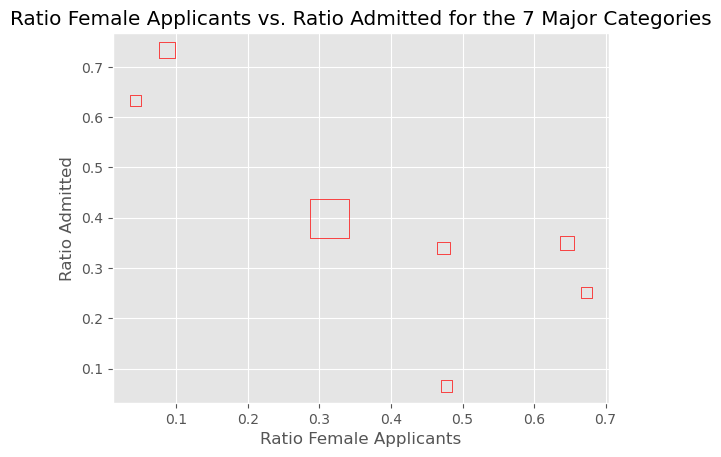

In [20]:
fig1_df = fig1_test.to_df()
plt.scatter(data = fig1_df, x = 'Ratio Female Applicants', y = 'Ratio Admitted', sizes = fig1_df['Number Applicants'] / 10, marker = 's', facecolors = 'none', edgecolors = 'red');
plt.xlabel('Ratio Female Applicants');
plt.ylabel('Ratio Admitted');
plt.title('Ratio Female Applicants vs. Ratio Admitted for the 7 Major Categories');

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 4: Grounding Analysis in Social Theory

### Thinking about Implications 🤔

### Question 4.1 (Discussion)
Consider the takeaways that you had after looking at the different visualizations you created in **Questions 2.4 and 2.6**. Based on what we've discussed regarding the various sociological paradigms, how do you think these conclusions best align with the paradigms? As a reminder, here are some brief summaries describing the four paradigms we looked at:
* **Structural Functionalism:** society is a collection of interrelated parts that come together to form a whole, and the goal is the survival and stability of the social system.
* **Conflict:** society is a collection of competing interests, and the theory focuses on understanding the relationships (coercion, domination, etc.) between the powerful vs. less-powerful social groups.
* **Rational Choice:** society is comprised of logical individuals making decisions that maximize self-interest, and the theory considers to what extent certain choices benefit individuals or society.
* **Symbolic Interactionism:** society plays out in face-to-face interactions, and the theory focuses on understanding how symbols and representations occur in small groups and reflect across society.

*Hint:* The conclusions might not line up perfectly with any one of the paradigms! Just feel free to reflect on which ones they might line up best or worst with. 

**SOLUTION:** The takeaway from the visualization in Question 2.4 likely best aligns with the conflict paradigm, as the consideration of calculating the aggregated average of males vs. females is primarily meant to explore the difference between the more "powerful" vs. less "powerful" gender groups in higher education. The takeaway from the visualization in Question 2.6 has aspects of the rational choice and symbolic interactionism paradigms, as it looks into which majors the different gender groups are choosing to apply to and how these decisions might be the best for them. It also breaks down the aggregated admission rates to look at the individuals at a lower, less aggregated level, in order to explore how the acceptance rates are varying by major.

### Question 4.2 (Discussion) 
A media company wants to make a report on UC Berkeley admissions. What would happen if they ONLY report with the visualization you created in **`Question 2.4`**? How would this report potentially impact the society we see today?

**SOLUTION:** Answer may vary. If we only report the first visualization we created, we will be creating a false narrative to an extent about systemic bias against female applicants. This can discourage some male applicants leading to further drastic acceptance rate. Or change the school policy / logistics if more audience pressures the school to take action based on the wrong analysis. Thus, whether it is leaving out certain visualizations or not recognizing certain phenomenon, data analysis can be malpracticed.

### Question 4.3 (Final Reflection)

**SOLUTION:** Answer will vary. Student's response should indicate some understanding of ways in which the wrong conclusion can be drawn when not enough care is taken for proper data exploration and visualization. Student can also reflect on societal impacts of these incorrect conclusions being drawn.

---
## Done! 😇

That's it! There's nowhere for you to submit this, as labs are not assignments. However, please ask any questions you have with this notebook in lab or on Ed.

There are no extra problems this week, good luck with the homework!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()